In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [7]:
data=pd.read_csv('titanic_train.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.shape

(891, 12)

In [46]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Methods to identity Missing Data


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data.isnull().sum().sum()

866

In [24]:
data['Age'].isnull().sum()

177

In [28]:
data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [32]:
data.notnull().sum().sum()

9826

In [30]:
data['Age'].notnull().sum()

714

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
data.isna().sum().sum()

866

## Handle Missing Values (First thing to do)

### 1. Mean, median and Mode imputation

In [48]:
data1=data[['Age','Fare','Survived']]

In [50]:
data1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [54]:
data1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [56]:
def impute_method(data1,variable,method):
    data1f[variable]=df[variable].fillna(method)


In [66]:
method1=data1.Age.median()
method2=data1.Fare.median()
method3=data1.Survived.median()


In [74]:
impute_method(data1,'Age',method1)
impute_method(data1,'Fare',method2)
impute_method(data1,'Survived',method3)

/tmp/ipykernel_12641/1283979210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=df[variable].fillna(method)


In [76]:
data1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [78]:
data1.isna().sum()

Age         0
Fare        0
Survived    0
dtype: int64

### 2. Random Sample Imputation

In [81]:
data2=data[['Age','Fare','Survived']]

In [85]:
data2.isna().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [93]:
data2['Age'].isna().sum()

177

In [95]:
rand_sample=data2['Age'].dropna().sample(data2['Age'].isnull().sum(),random_state=50)

In [97]:
rand_sample

695    52.0
446    13.0
218    32.0
369    24.0
652    21.0
       ... 
787     8.0
366    60.0
255    29.0
708    22.0
188    40.0
Name: Age, Length: 177, dtype: float64

In [101]:
data2[data2['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [103]:
rand_sample.index=data2[data2['Age'].isnull()].index
rand_sample

5      52.0
17     13.0
19     32.0
26     24.0
28     21.0
       ... 
859     8.0
863    60.0
868    29.0
878    22.0
888    40.0
Name: Age, Length: 177, dtype: float64

In [105]:
def impute_nan_random(data2, variable):
    data2[variable+"_random"] = data2[variable]
    # it will have random sample to fill the na
    rand_sample = data2[variable].dropna().sample(data2['Age'].isnull().sum(),random_state = 0)
    # pandas need to have same index in order to merge the dataset
    rand_sample.index=data2[data2[variable].isnull()].index
    data2.loc[data2[variable].isnull(),variable+'_random'] = rand_sample

In [111]:
import warnings
warnings.filterwarnings('ignore')  # Suppresses all warnings

In [113]:
impute_nan_random(data2,"Age")
data2.head(2)

,Age,Fare,Survived,Age_random
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0


In [119]:
data2['Age'].fillna(data2["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [121]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         714 non-null    float64
 1   Fare        891 non-null    float64
 2   Survived    891 non-null    int64  
 3   Age_random  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


AttributeError: 'DataFrame' object has no attribute 'Age_mean'

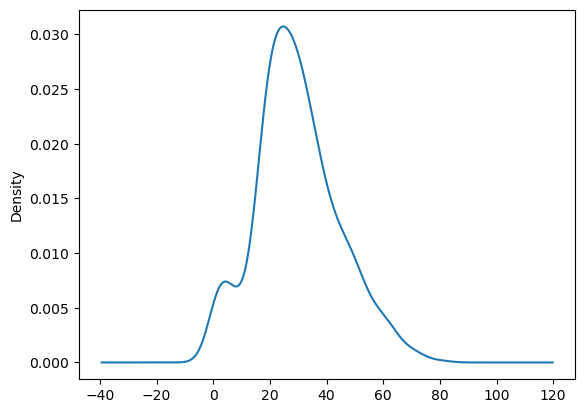

In [123]:
fig = plt.figure()
ax =  fig.add_subplot(111)
data2['Age'].plot(kind='kde', ax=ax)
data2.Age_mean.plot(kind='kde', ax=ax, color = 'black')
data2.Age_median.plot(kind='kde', ax=ax, color = 'red')
data2.Age_random.plot(kind='kde', ax=ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')